# Working with a full instrument response

In the last tutorial we saw how to use an RSP file, which contains the response for a single detector and a single coordinate. If you don't provide `bc-rsp` with the `--direction` flag, it will generate an HDF5 file containning the detector response matrices (DRMs) for all detectors and multiple directions covering the full sky (in a HEALPix grid). If you want to use the GBM software, a convenient way to get an RSP file from a full `DRM` is to use the script `bc-rsp-extractor`.

You can also get information directy from the `DRM`. The class to access this file is `bctools.io.DRM`. For example, let's get the effective area at 100 keV as a function of the angle with respect to to the normal of the first Single Quarter Detector:

/Users/imartin5/burstcube/software/gbm-data-tools/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


Detectors: ['SQD0', 'SQD1', 'SQD2', 'SQD3']


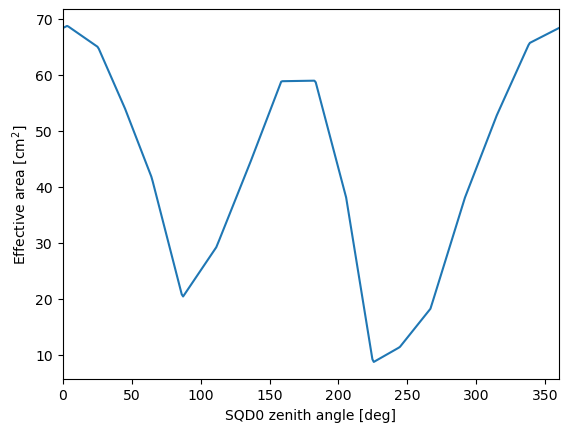

In [1]:
import bctools.data as data
from bctools.io import InstrumentResponse
from bctools.util.coords import SpacecraftCoords
import bctools.util.units as u

import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0,360, 360)*u.deg
energy = 100 * u.keV

# The best way to work with them is to use them as context manager
# The alternative to using context manager is to remember to call close() when you are done with the file.
with InstrumentResponse(data.path/'sims/drm.h5') as irf:    

    # You can get a list of the detector IDs
    print("Detectors: {}".format(irf.detectors))
    
    # SQD0 zenith is pointing at 45d,45d in the spacecraft coordinates
    eff_area = []
    
    for angle in theta:
        
        coords = SpacecraftCoords(45*u.deg + angle, 45*u.deg)
    
        drm = irf.get_drm("SQD0", coords = coords)
        
        
        eff_area += [drm.effective_area(energy)]
            
    
fig,ax = plt.subplots()

ax.plot(theta/u.deg, eff_area);

ax.set_xlim(0,360)

ax.set_xlabel("SQD0 zenith angle [deg]")
ax.set_ylabel("Effective area [cm$^2$]");

The effective area is not symmetric around 180$^\circ$ because the *shadowing* effect from the other simulated components is taken into account.

This plot is not very smooth because the underlying DRM used for this example has low resolution. You can see this with

In [14]:
with InstrumentResponse(data.path/'sims/drm.h5') as irf:    

    # You can get a list of the detector IDs
    print("Detectors: {}".format(irf.detectors))
    
    # SQD0 zenith is pointing at 45d,45d in the spacecraft coordinates
    eff_area = []
    
    for angle in theta:
        
        coords = SpacecraftCoords(45*u.deg + angle, 45*u.deg)
    
        drm = irf.get_drm("SQD0", coords = coords)
        
        
        eff_area += [drm.effective_area(energy)]

'all'

In [18]:
dir(drm)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_drm',
 '_eff_area',
 'axes',
 'channel_effective_area',
 'effective_area',
 'energy_channels',
 'fold_spectrum',
 'from_gbm_rsp',
 'from_gbm_rsp_file',
 'load',
 'photon_energies',
 'to_gbm_rsp',
 'to_gbm_rsp_file',
 'write']

In [16]:
drma.to_gbm_rsp().write("./", "coso.rsp")

/Users/imartin5/.local/lib/python3.7/site-packages/astropy/io/fits/column.py:649: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array)


In [11]:
help(drm.to_gbm_rsp().write)

Help on method write in module gbm.data.drm:

write(directory, filename=None, **kwargs) method of gbm.data.drm.RSP instance
    Writes a single-DRM RSP object to a FITS file.
    
    Args:
        directory (str): Where to write the file
        filename (str, optional): The filename to write to



In [2]:
with InstrumentResponse(data.path/'sims/drm.h5') as irf:
    
    nside = irf.nside
    
print("Underlying HEALPix NSIDE = {}".format(nside))
print("This means only {} directions were simulated".format(12*nside*nside))

Underlying HEALPix NSIDE = 2
This means only 48 directions were simulated
